In [3]:
#IMPORTS

import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)
import time

# FOUR PEAKS PROBLEM : GA ADVANTAGE

# TSP PROBLEM : SA ADVANTAGE

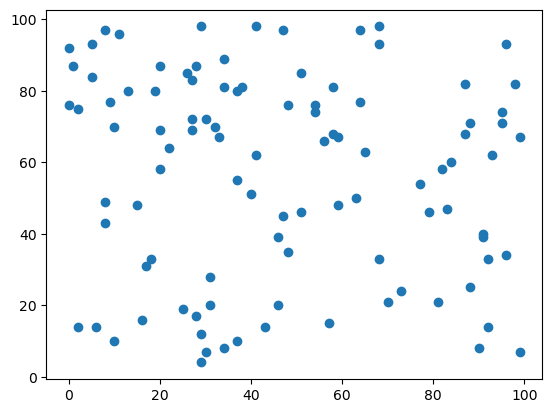

In [85]:
num_cities=100
edges=[]
for i in range(num_cities):
    x=random.randint(0,100)
    y=random.randint(0,100)
    edges.append((x,y))

coords_list = edges

# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

plt.scatter([x for x,y in coords_list], [y for x,y in coords_list])

plt.show()

#PROBLEM_SIZES=[10,50,100,400]
#generate 4 problems.

edges10=[]
edges50=[]
edges100=[]
edges400=[]

for i in range(10):
    x=random.randint(0,100) 
    y=random.randint(0,100)
    edges10.append((x,y))
for i in range(50):
    x=random.randint(0,100)
    y=random.randint(0,100)
    edges50.append((x,y))
for i in range(100):
    x=random.randint(0,100)
    y=random.randint(0,100)
    edges100.append((x,y))
for i in range(400):
    x=random.randint(0,100)
    y=random.randint(0,100)
    edges400.append((x,y))

COMPARE=[edges10,edges50,edges100,edges400]


### RHC for TSP

the max best fitness is 2538.9558610886056


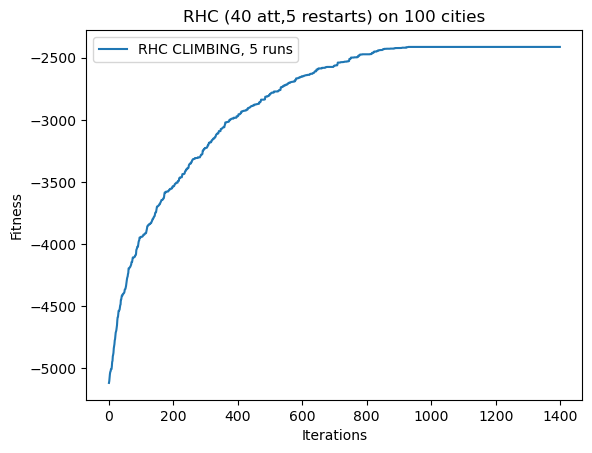

In [86]:
RUNS=5
graphLen=1400
problem = mlrose.TSPOpt(length = len(edges), fitness_fn = fitness_coords, maximize=False)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.random_hill_climb(problem, max_attempts=40, max_iters=graphLen, restarts=5, init_state=None, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(-actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('RHC (40 att,5 restarts) on 100 cities')
plt.legend(['RHC CLIMBING, 5 runs'])
plt.show()






In [87]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[10,50,100,400]
AVERAGING=3

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=1700

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])
    print(COMPARE[p])
    problem = mlrose.TSPOpt(length = PROBLEM_SIZES[p], fitness_fn = mlrose.TravellingSales(coords = COMPARE[p]), maximize=False)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.random_hill_climb(problem, max_attempts=40, max_iters=maxIterations, restarts=5, init_state=None, curve=True, random_state=averageOutRandomness)

        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)



10
[(70, 29), (75, 28), (0, 9), (90, 80), (7, 29), (8, 4), (42, 9), (65, 30), (35, 85), (62, 27)]


50
[(69, 16), (92, 73), (73, 60), (31, 100), (60, 52), (24, 12), (12, 84), (55, 45), (54, 52), (59, 93), (6, 86), (83, 82), (12, 7), (51, 93), (43, 13), (31, 24), (24, 68), (57, 17), (54, 23), (35, 59), (31, 9), (56, 70), (12, 6), (83, 69), (1, 11), (96, 30), (21, 52), (62, 61), (27, 51), (7, 21), (48, 0), (49, 33), (100, 100), (58, 36), (54, 89), (93, 100), (71, 84), (91, 62), (19, 24), (37, 27), (7, 74), (94, 69), (7, 95), (40, 7), (6, 74), (61, 64), (67, 20), (7, 65), (10, 23), (8, 76)]
100
[(8, 86), (30, 51), (15, 72), (31, 74), (76, 5), (79, 10), (53, 84), (74, 72), (66, 40), (33, 26), (85, 91), (40, 30), (33, 50), (16, 85), (82, 38), (58, 40), (96, 9), (1, 58), (79, 72), (12, 9), (68, 27), (64, 33), (16, 44), (8, 31), (47, 36), (20, 56), (69, 90), (38, 78), (83, 67), (1, 85), (70, 38), (84, 13), (17, 33), (14, 13), (95, 70), (19, 34), (36, 77), (26, 91), (43, 26), (87, 81), (33, 64), (62, 32), (6, 11), (81, 54), (35, 5), (0, 42), (98, 16), (81, 33), (20, 94), (56, 70), (90, 54), 

### SA for TSP

the max best fitness is 2272.6666127551493


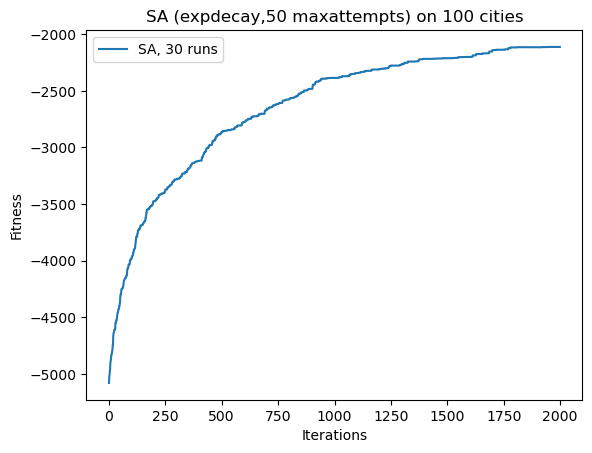

In [94]:
RUNS=4
graphLen=2000
problem = mlrose.TSPOpt(length = len(edges), fitness_fn = fitness_coords, maximize=False)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    schedule=mlrose.ExpDecay(init_temp=2, exp_const=0.000021, min_temp=0.01)
    best_state, best_fitness,fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=70, max_iters=graphLen, init_state=None, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(-actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('SA (expdecay,50 maxattempts) on 100 cities')
plt.legend(['SA, 30 runs'])
plt.show()





In [98]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[10,50,100,400]
AVERAGING=5

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=2200

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])
    print(COMPARE[p])
    problem = mlrose.TSPOpt(length = PROBLEM_SIZES[p], fitness_fn = mlrose.TravellingSales(coords = COMPARE[p]), maximize=False)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        schedule=mlrose.ExpDecay(init_temp=3, exp_const=0.000021, min_temp=0.001)
        best_state,best_fitness,curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=maxIterations, init_state=None, curve=True, random_state=averageOutRandomness)

        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)



10
[(70, 29), (75, 28), (0, 9), (90, 80), (7, 29), (8, 4), (42, 9), (65, 30), (35, 85), (62, 27)]


50
[(69, 16), (92, 73), (73, 60), (31, 100), (60, 52), (24, 12), (12, 84), (55, 45), (54, 52), (59, 93), (6, 86), (83, 82), (12, 7), (51, 93), (43, 13), (31, 24), (24, 68), (57, 17), (54, 23), (35, 59), (31, 9), (56, 70), (12, 6), (83, 69), (1, 11), (96, 30), (21, 52), (62, 61), (27, 51), (7, 21), (48, 0), (49, 33), (100, 100), (58, 36), (54, 89), (93, 100), (71, 84), (91, 62), (19, 24), (37, 27), (7, 74), (94, 69), (7, 95), (40, 7), (6, 74), (61, 64), (67, 20), (7, 65), (10, 23), (8, 76)]
100
[(8, 86), (30, 51), (15, 72), (31, 74), (76, 5), (79, 10), (53, 84), (74, 72), (66, 40), (33, 26), (85, 91), (40, 30), (33, 50), (16, 85), (82, 38), (58, 40), (96, 9), (1, 58), (79, 72), (12, 9), (68, 27), (64, 33), (16, 44), (8, 31), (47, 36), (20, 56), (69, 90), (38, 78), (83, 67), (1, 85), (70, 38), (84, 13), (17, 33), (14, 13), (95, 70), (19, 34), (36, 77), (26, 91), (43, 26), (87, 81), (33, 64), (62, 32), (6, 11), (81, 54), (35, 5), (0, 42), (98, 16), (81, 33), (20, 94), (56, 70), (90, 54), 

### GA for TSP

In [101]:
RUNS=2
graphLen=600
problem = mlrose.TSPOpt(length = len(edges), fitness_fn = fitness_coords, maximize=False)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]

print(len(edges))

#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):
    print('progres')

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.genetic_alg(problem, pop_size=120, mutation_prob=0.15, max_attempts=10, max_iters=graphLen, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(-actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('GA (100,.15,10) on 100 cities')
plt.legend(['GA for TSP, 5 runs'])
plt.show()



100
progres


KeyboardInterrupt: 

In [102]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[10,50,100]
AVERAGING=2

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=300

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])
    print(COMPARE[p])
    problem = mlrose.TSPOpt(length = PROBLEM_SIZES[p], fitness_fn = mlrose.TravellingSales(coords = COMPARE[p]), maximize=False)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.genetic_alg(problem, pop_size=100, mutation_prob=0.15, max_attempts=10, max_iters=maxIterations, curve=True, random_state=averageOutRandomness)

        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)



10
[(70, 29), (75, 28), (0, 9), (90, 80), (7, 29), (8, 4), (42, 9), (65, 30), (35, 85), (62, 27)]
50
[(69, 16), (92, 73), (73, 60), (31, 100), (60, 52), (24, 12), (12, 84), (55, 45), (54, 52), (59, 93), (6, 86), (83, 82), (12, 7), (51, 93), (43, 13), (31, 24), (24, 68), (57, 17), (54, 23), (35, 59), (31, 9), (56, 70), (12, 6), (83, 69), (1, 11), (96, 30), (21, 52), (62, 61), (27, 51), (7, 21), (48, 0), (49, 33), (100, 100), (58, 36), (54, 89), (93, 100), (71, 84), (91, 62), (19, 24), (37, 27), (7, 74), (94, 69), (7, 95), (40, 7), (6, 74), (61, 64), (67, 20), (7, 65), (10, 23), (8, 76)]
100
[(8, 86), (30, 51), (15, 72), (31, 74), (76, 5), (79, 10), (53, 84), (74, 72), (66, 40), (33, 26), (85, 91), (40, 30), (33, 50), (16, 85), (82, 38), (58, 40), (96, 9), (1, 58), (79, 72), (12, 9), (68, 27), (64, 33), (16, 44), (8, 31), (47, 36), (20, 56), (69, 90), (38, 78), (83, 67), (1, 85), (70, 38), (84, 13), (17, 33), (14, 13), (95, 70), (19, 34), (36, 77), (26, 91), (43, 26), (87, 81), (33, 64),

### mimic for TSP

100
progres
progres
the max best fitness is 4565.167733175017


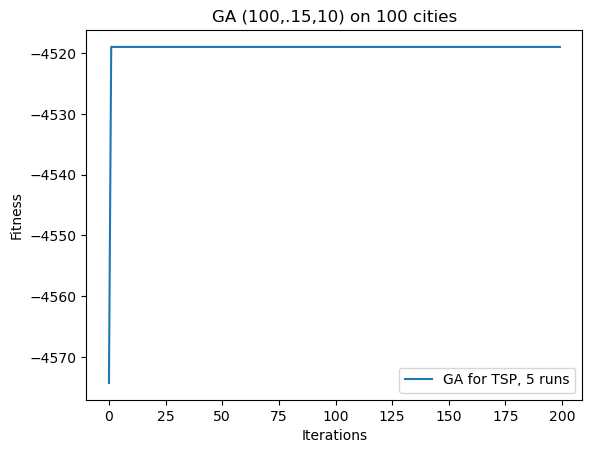

In [107]:
RUNS=2
graphLen=200
problem = mlrose.TSPOpt(length = len(edges), fitness_fn = fitness_coords, maximize=False)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]

print(len(edges))

#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):
    print('progres')

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.5, max_attempts=1, max_iters=graphLen, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(-actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('GA (100,.15,10) on 100 cities')
plt.legend(['GA for TSP, 5 runs'])
plt.show()

In [111]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[10,50]
AVERAGING=1
#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=200

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])
    print(COMPARE[p])
    problem = mlrose.TSPOpt(length = PROBLEM_SIZES[p], fitness_fn = mlrose.TravellingSales(coords = COMPARE[p]), maximize=False)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.5, max_attempts=1, max_iters=maxIterations, curve=True, random_state=averageOutRandomness)

        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)



10
[(70, 29), (75, 28), (0, 9), (90, 80), (7, 29), (8, 4), (42, 9), (65, 30), (35, 85), (62, 27)]
50
[(69, 16), (92, 73), (73, 60), (31, 100), (60, 52), (24, 12), (12, 84), (55, 45), (54, 52), (59, 93), (6, 86), (83, 82), (12, 7), (51, 93), (43, 13), (31, 24), (24, 68), (57, 17), (54, 23), (35, 59), (31, 9), (56, 70), (12, 6), (83, 69), (1, 11), (96, 30), (21, 52), (62, 61), (27, 51), (7, 21), (48, 0), (49, 33), (100, 100), (58, 36), (54, 89), (93, 100), (71, 84), (91, 62), (19, 24), (37, 27), (7, 74), (94, 69), (7, 95), (40, 7), (6, 74), (61, 64), (67, 20), (7, 65), (10, 23), (8, 76)]


# KNAPSACK

In [2]:
fitness=mlrose.Knapsack(weights=[54, 95, 36, 18, 4, 71, 83, 16, 27, 84, 88, 45, 94, 64, 14, 80, 4, 23,
75, 36, 90, 20, 77, 32, 58, 6, 14, 86, 84, 59, 71, 21, 30, 22, 96, 49, 81,
48, 37, 28, 6, 84, 19, 55, 88, 38, 51, 52, 79, 55, 70, 53, 64, 99, 61, 86,
1, 64, 32, 60, 42, 45, 34, 22, 49, 37, 33, 1, 78, 43, 85, 24, 96, 32, 99,
57, 23, 8, 10, 74, 59, 89, 95, 40, 46, 65, 6, 89, 84, 83, 6, 19, 45, 59,
26, 13, 8, 26, 5, 9],values=[297, 295, 293, 292, 291, 289, 284, 284, 283, 283, 281, 280, 279,
277, 276, 275, 273,264, 260, 257, 250, 236, 236, 235, 235, 233, 232,
232, 228, 218, 217, 214, 211, 208, 205, 204, 203, 201, 196, 194, 193,
193, 192, 191, 190, 187, 187, 184, 184, 184, 181, 179, 176, 173, 172,
171, 160, 128, 123, 114, 113, 107, 105, 101, 100, 100, 99, 98, 97, 94,
94, 93, 91, 80, 74, 73, 72, 63, 63, 62, 61, 60, 56, 53, 52, 50, 48, 46,
40, 40, 35, 28, 22, 22, 18, 15, 12, 11, 6, 5],max_weight_pct=0.6)

NameError: name 'mlrose' is not defined

### RHC for KS

the max best fitness is 11175.0


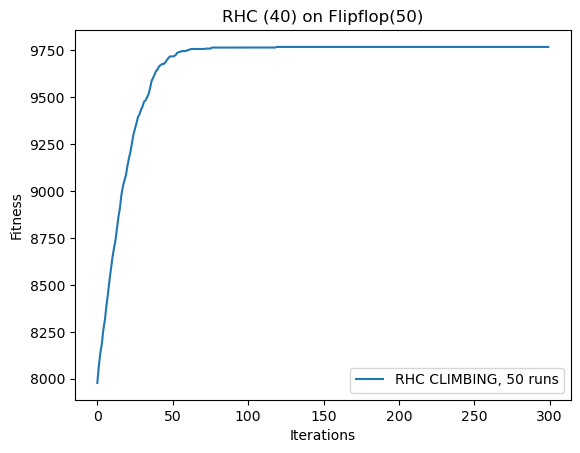

In [64]:
RUNS=50
graphLen=300
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val = 2)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.random_hill_climb(problem, max_attempts=40, max_iters=graphLen, restarts=0, init_state=None, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('RHC (40) on Flipflop(50)')
plt.legend(['RHC CLIMBING, 50 runs'])
plt.show()





In [ ]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

### SA for KS

the max best fitness is 10772.0


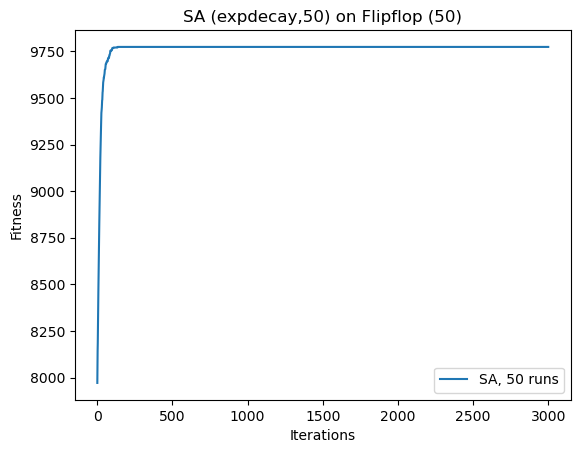

In [65]:
RUNS=50
graphLen=3000
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val = 2)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    schedule=mlrose.ExpDecay(init_temp=1, exp_const=0.002, min_temp=0.07)
    best_state, best_fitness,fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=50, max_iters=graphLen, init_state=None, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('SA (expdecay,50) on Flipflop (50)')
plt.legend(['SA, 50 runs'])
plt.show()





In [ ]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

### GA for KS

the max best fitness is 13585.0


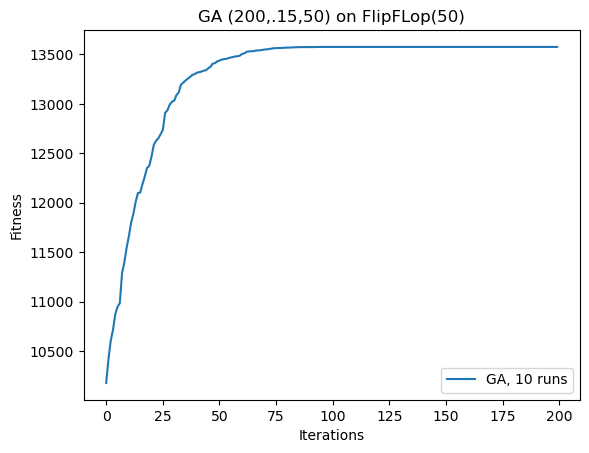

In [66]:
RUNS=10
graphLen=200
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val = 2)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.15, max_attempts=50, max_iters=graphLen, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('GA (200,.15,50) on FlipFLop(50)')
plt.legend(['GA, 10 runs'])
plt.show()





In [ ]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

### mimic for KS

the max best fitness is 13551.0


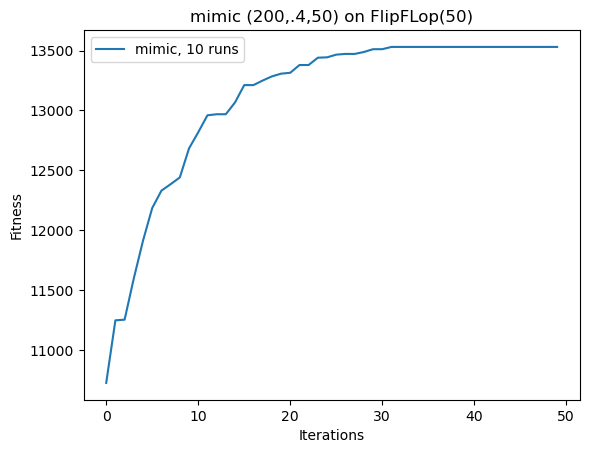

In [71]:
RUNS=2
graphLen=50
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.mimic(problem, pop_size=800, keep_pct=0.4, max_attempts=5, max_iters=graphLen, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('mimic (200,.4,50) on FlipFLop(50)')
plt.legend(['mimic, 10 runs'])
plt.show()





In [ ]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

# suite

# 4 peaks problem

In [5]:
fitness=mlrose.FourPeaks(t_pct=0.25)

### RHC for 4p

the max best fitness is 50.0


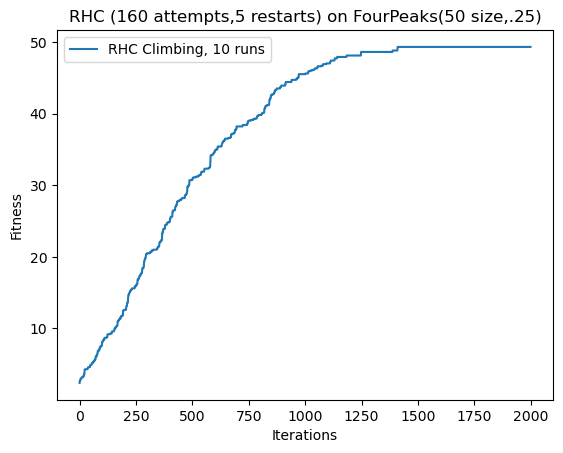

In [24]:
RUNS=10
graphLen=2000
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.random_hill_climb(problem, max_attempts=160, max_iters=graphLen, restarts=5, init_state=None, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)






print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('RHC (160 attempts,5 restarts) on FourPeaks(50 size,.25)')
plt.legend(['RHC Climbing, 10 runs'])
plt.show()





In [28]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[10,50,100,400]
AVERAGING=10

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=2000

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])

    problem = mlrose.DiscreteOpt(length = PROBLEM_SIZES[p], fitness_fn = fitness, maximize = True, max_val = 2)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.random_hill_climb(problem, max_attempts=300, max_iters=maxIterations, restarts=20, init_state=None, curve=True, random_state=averageOutRandomness)

        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (s) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)

10
50
100
400
the problem sizes are
[10, 50, 100, 400]
the fevals are
[33863.1, 141954.1, 149323.1, 50839.0]
the final fitnesses are
[16.0, 50.0, 61.2, 12.4]
the clock times are
[0.2312093734741211, 0.6396693229675293, 0.6210956573486328, 0.2087777853012085]
-------BELOW IN LATEX TABLE FORMAT-------

\begin{center}
\begin{tabular}{||c c c c c||} 
 \hline
 Problem Size & FEvals & Final Fitness & Clock Time (s) & Time per FEval (m s/FEval) \\ [0.5ex] 
 \hline\hline
10 & 33863.1 & 16.0 & 0.231 & 0.007 \\ \hline
50 & 141954.1 & 50.0 & 0.64 & 0.005 \\ \hline
100 & 149323.1 & 61.2 & 0.621 & 0.004 \\ \hline
400 & 50839.0 & 12.4 & 0.209 & 0.004 \\ \hline
\end{tabular}
\end{center}


### SA for 4p

the max best fitness is 50.0


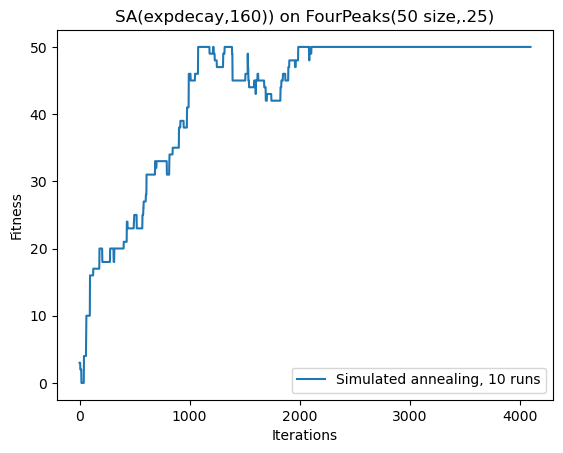

In [6]:
RUNS=1
graphLen=4100
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.simulated_annealing(problem, schedule=mlrose.ExpDecay(init_temp=1, exp_const=0.000012, min_temp=0.008), max_attempts=160, max_iters=graphLen, init_state=None, curve=True, random_state=averageOutRandomness*42)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('SA(expdecay,160)) on FourPeaks(50 size,.25)')
plt.legend(['Simulated annealing, 1 runs'])
plt.show()





In [31]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[10,50,100,400]
AVERAGING=10

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=4900

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])

    problem = mlrose.DiscreteOpt(length = PROBLEM_SIZES[p], fitness_fn=fitness, maximize = True, max_val = 2)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.simulated_annealing(problem, schedule=mlrose.ExpDecay(init_temp=1, exp_const=0.000008, min_temp=0.008), max_attempts=160, max_iters=graphLen, init_state=None, curve=True, random_state=averageOutRandomness)

        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)


10
50
100
400
the problem sizes are
[10, 50, 100, 400]
the fevals are
[4460.3, 3959.8, 7131.8, 8132.6]
the final fitnesses are
[15.8, 50.0, 46.1, 11.8]
the clock times are
[0.2432166576385498, 0.11127719879150391, 0.2431575298309326, 0.1628894805908203]
-------BELOW IN LATEX TABLE FORMAT-------

\begin{center}
\begin{tabular}{||c c c c c||} 
 \hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\ [0.5ex] 
 \hline\hline
10 & 4460.3 & 15.8 & 0.243 & 0.055 \\ \hline
50 & 3959.8 & 50.0 & 0.111 & 0.028 \\ \hline
100 & 7131.8 & 46.1 & 0.243 & 0.034 \\ \hline
400 & 8132.6 & 11.8 & 0.163 & 0.02 \\ \hline
\end{tabular}
\end{center}


### GA for 4p

the max best fitness is 86.0


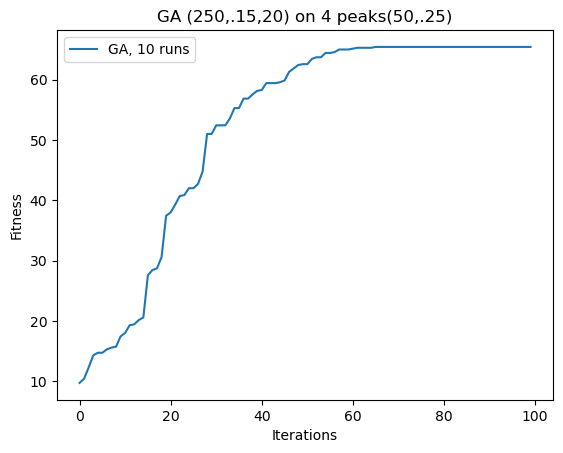

In [45]:
RUNS=7
graphLen=100
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.genetic_alg(problem, pop_size=250, mutation_prob=0.4, max_attempts=20, max_iters=graphLen, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('GA (250,.15,20) on 4 peaks(50,.25)')
plt.legend(['GA, 10 runs'])
plt.show()





In [77]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[400]
AVERAGING=1

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=160

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])

    problem = mlrose.DiscreteOpt(length = PROBLEM_SIZES[p], fitness_fn=fitness, maximize = True, max_val = 2)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.genetic_alg(problem, pop_size=2000, mutation_prob=0.1, max_attempts=70, max_iters=graphLen, curve=True, random_state=averageOutRandomness)
        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)

400
the problem sizes are
[400]
the fevals are
[202109.0]
the final fitnesses are
[259.0]
the clock times are
[67.24136209487915]
-------BELOW IN LATEX TABLE FORMAT-------

\begin{center}
\begin{tabular}{||c c c c c||} 
 \hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\ [0.5ex] 
 \hline\hline
400 & 202109.0 & 259.0 & 67.241 & 0.333 \\ \hline
\end{tabular}
\end{center}


### mimic for 4p

the max best fitness is 74.0


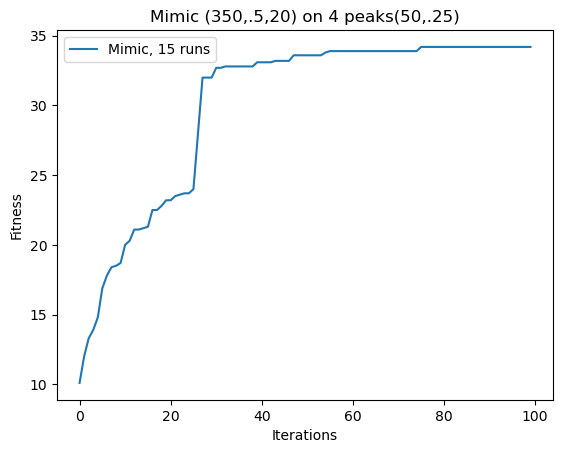

In [51]:
RUNS=10
graphLen=100
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.mimic(problem, pop_size=350, keep_pct=0.4, max_attempts=60, max_iters=graphLen, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('Mimic (350,.4,60) on 4 peaks(50,.25)')
plt.legend(['Mimic, 15 runs'])
plt.show()





In [76]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[400]
AVERAGING=1

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=90

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])

    problem = mlrose.DiscreteOpt(length = PROBLEM_SIZES[p], fitness_fn=fitness, maximize = True, max_val = 2)
    problem.set_mimic_fast_mode(True)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.mimic(problem, pop_size=500, keep_pct=0.25, max_attempts=5, max_iters=graphLen, curve=True, random_state=averageOutRandomness)
        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)

400
the problem sizes are
[400]
the fevals are
[21570.0]
the final fitnesses are
[347.0]
the clock times are
[72.18424201011658]
-------BELOW IN LATEX TABLE FORMAT-------

\begin{center}
\begin{tabular}{||c c c c c||} 
 \hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\ [0.5ex] 
 \hline\hline
400 & 21570.0 & 347.0 & 72.184 & 3.347 \\ \hline
\end{tabular}
\end{center}


1697371045.902474
1697371046.59507


# FF

In [54]:
fitness=mlrose.FlipFlop()

### RHC for FF

the max best fitness is 45.0


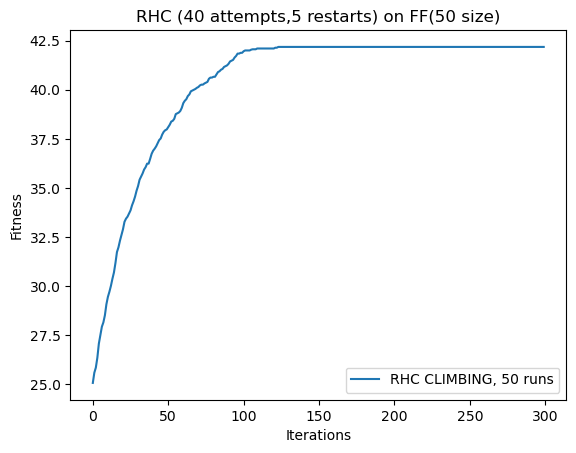

In [55]:
RUNS=50
graphLen=300
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.random_hill_climb(problem, max_attempts=40, max_iters=graphLen, restarts=5, init_state=None, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('RHC (40 attempts,5 restarts) on FF(50 size)')
plt.legend(['RHC CLIMBING, 50 runs'])
plt.show()





In [57]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[10,50,100,400]
AVERAGING=30

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=300

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])

    problem = mlrose.DiscreteOpt(length = PROBLEM_SIZES[p], fitness_fn = mlrose.FlipFlop(), maximize = True, max_val = 2)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.random_hill_climb(problem, max_attempts=40, max_iters=maxIterations, restarts=5, init_state=None, curve=True, random_state=averageOutRandomness)

        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)

10


50
100
400
the problem sizes are
[10, 50, 100, 400]
the fevals are
[4659.1, 9804.566666666668, 14516.866666666667, 29884.7]
the final fitnesses are
[8.633333333333333, 42.06666666666667, 81.83333333333333, 292.23333333333335]
the clock times are
[0.03150009314219157, 0.06502745151519776, 0.07442732652028401, 0.6206801493962606]
-------BELOW IN LATEX TABLE FORMAT-------

\begin{center}
\begin{tabular}{||c c c c c||} 
 \hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\ [0.5ex] 
 \hline\hline
10 & 4659.1 & 8.633333333333333 & 0.032 & 0.007 \\ \hline
50 & 9804.567 & 42.06666666666667 & 0.065 & 0.007 \\ \hline
100 & 14516.867 & 81.83333333333333 & 0.074 & 0.005 \\ \hline
400 & 29884.7 & 292.23333333333335 & 0.621 & 0.021 \\ \hline
\end{tabular}
\end{center}


### SA for FF

the max best fitness is 49.0


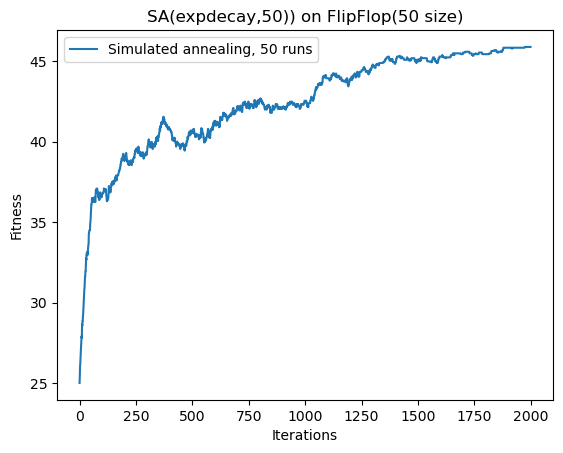

In [60]:
RUNS=20
graphLen=2000
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.simulated_annealing(problem, schedule=mlrose.ExpDecay(init_temp=0.8, exp_const=0.0005, min_temp=0.02), max_attempts=50, max_iters=graphLen, init_state=None, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('SA(expdecay,50)) on FlipFlop(50 size)')
plt.legend(['Simulated annealing, 50 runs'])
plt.show()





In [62]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[10,50,100,400]
AVERAGING=8

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=2500

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])

    problem = mlrose.DiscreteOpt(length = PROBLEM_SIZES[p], fitness_fn=fitness, maximize = True, max_val = 2)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.simulated_annealing(problem,schedule=mlrose.ExpDecay(init_temp=0.8, exp_const=0.0005, min_temp=0.02), max_attempts=50, max_iters=graphLen, init_state=None, curve=True, random_state=averageOutRandomness)

        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)


10
50
100
400
the problem sizes are
[10, 50, 100, 400]
the fevals are
[1444.625, 2454.5, 2605.0, 2825.125]
the final fitnesses are
[9.0, 45.75, 90.25, 347.125]
the clock times are
[0.13698795437812805, 0.3009679615497589, 0.24051585793495178, 1.3665650188922882]
-------BELOW IN LATEX TABLE FORMAT-------

\begin{center}
\begin{tabular}{||c c c c c||} 
 \hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\ [0.5ex] 
 \hline\hline
10 & 1444.625 & 9.0 & 0.137 & 0.095 \\ \hline
50 & 2454.5 & 45.75 & 0.301 & 0.123 \\ \hline
100 & 2605.0 & 90.25 & 0.241 & 0.092 \\ \hline
400 & 2825.125 & 347.125 & 1.367 & 0.484 \\ \hline
\end{tabular}
\end{center}


### GA for FF

[1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1
 0 1 0 0 1 0 0 1 1 0 1 0 1]
[0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1]
[1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 1 0 1 0 1]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 0 1 0 1]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 1 1 0 1 0 1 0 1 0]
[0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 1 0]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 1 0 0 1 0 1 0 1]
[0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 0 1]
[0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0]
[1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 

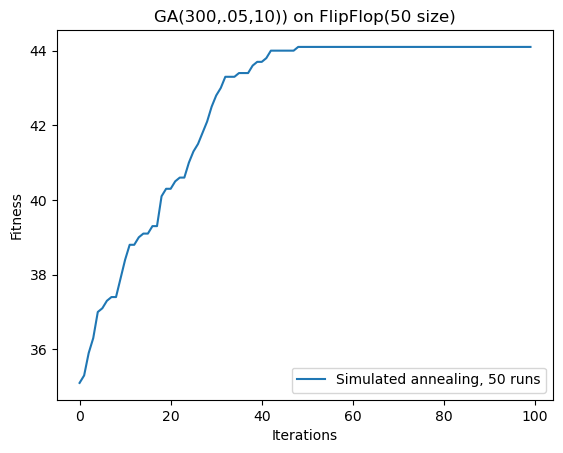

In [146]:
RUNS=10
graphLen=100
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve = mlrose.genetic_alg(problem, pop_size=300, mutation_prob=0.02, max_attempts=10, max_iters=graphLen, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    print(best_state)
    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('GA(300,.05,10)) on FlipFlop(50 size)')
plt.legend(['Simulated annealing, 50 runs'])
plt.show()

In [78]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[400]
AVERAGING=2

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=150

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])

    problem = mlrose.DiscreteOpt(length = PROBLEM_SIZES[p], fitness_fn=fitness, maximize = True, max_val = 2)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.genetic_alg(problem, pop_size=1000, mutation_prob=0.05, max_attempts=50, max_iters=graphLen, curve=True, random_state=averageOutRandomness)
        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)

400
the problem sizes are
[400]
the fevals are
[92603.5]
the final fitnesses are
[256.5]
the clock times are
[28.326048731803894]
-------BELOW IN LATEX TABLE FORMAT-------

\begin{center}
\begin{tabular}{||c c c c c||} 
 \hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\ [0.5ex] 
 \hline\hline
400 & 92603.5 & 256.5 & 28.326 & 0.306 \\ \hline
\end{tabular}
\end{center}


### mimic for FF

ptorgress
ptorgress
ptorgress
the max best fitness is 48.0


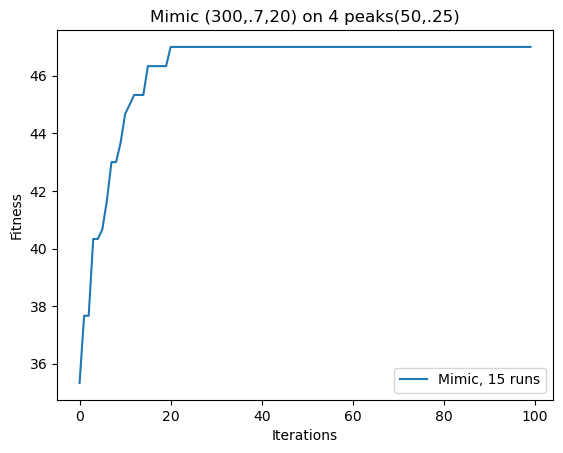

In [69]:
RUNS=3
graphLen=100
problem = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
actualFitnessCurves = []
actualFunctionCallsCurves=[]
bestFitnesses=[]



#FIRST STEP : FITNESS VS ITERATION
for averageOutRandomness in range(0,RUNS):
    print('ptorgress')

    #PARAMETERS HERE !!!!!!!!!
    best_state, best_fitness,fitness_curve =mlrose.mimic(problem, pop_size=180, keep_pct=0.4, max_attempts=40, max_iters=graphLen, curve=True, random_state=averageOutRandomness)

    bestFitnesses.append(best_fitness)

    thisRunFitness=[x for x,y in fitness_curve]
    thisRunEvals=[y for x,y in fitness_curve]

    #make both arrays length graphLen by adding their last value to the end of the array enough times
    thisRunFitness = thisRunFitness + [thisRunFitness[-1]]*(graphLen-thisRunFitness.__len__())
    thisRunEvals = thisRunEvals + [thisRunEvals[-1]]*(graphLen-thisRunEvals.__len__())

    actualFitnessCurves.append(thisRunFitness)
    actualFunctionCallsCurves.append(thisRunEvals)




print('the max best fitness is '+str(max(bestFitnesses)))

actualFinalFitnessCurve = np.zeros(actualFitnessCurves[0].__len__())
#fill it up by adding all the fitness curves then dividing by the number of fitness curves
for fitnessCurve in actualFitnessCurves:
    actualFinalFitnessCurve = actualFinalFitnessCurve + np.array(fitnessCurve)
actualFinalFitnessCurve = actualFinalFitnessCurve/actualFitnessCurves.__len__()

plt.plot(actualFinalFitnessCurve)
plt.xlabel('Iterations')
plt.ylabel('Fitness')


# CHANGE LEGEND
plt.title('Mimic (300,.7,20) on 4 peaks(50,.25)')
plt.legend(['Mimic, 15 runs'])
plt.show()





In [84]:
#SECOND STEP : RECORD WALL TIMES AND FINAL FITNESS FOR MULTIPLE PROBLEM SIZES

PROBLEM_SIZES=[10,50,100,400]
AVERAGING=1

#for each problem size we want : clock time, final fitness, and number of fevals

clockTimes=[]
finalFitnesses=[]
fevals=[]


maxIterations=75

for p in range(len(PROBLEM_SIZES)):
    print(PROBLEM_SIZES[p])
    problem = mlrose.DiscreteOpt(length = PROBLEM_SIZES[p], fitness_fn=fitness, maximize = True, max_val = 2)
    problem.set_mimic_fast_mode(True)




    #FIRST STEP : FITNESS VS ITERATION

    fitnessSum=0
    evalSum=0
    timeSum=0
    for averageOutRandomness in range(0,AVERAGING):
        start=time.time()
        #PARAMETERS HERE !!!!!!!!!
        best_state,best_fitness,curve = mlrose.mimic(problem, pop_size=600, keep_pct=0.27, max_attempts=10, max_iters=maxIterations, curve=True, random_state=averageOutRandomness)
        fitnessSum+=(best_fitness)
    

        end=time.time()
        timeSum+=(end-start)
        evalSum+=(curve[-1][1])
    clockTimes.append(timeSum/AVERAGING)
    finalFitnesses.append(fitnessSum/AVERAGING)
    fevals.append(evalSum/AVERAGING)


# Printing the arrays
print("the problem sizes are")
print(PROBLEM_SIZES)
print("the fevals are")
print(fevals)
print("the final fitnesses are")
print(finalFitnesses)
print("the clock times are")
print(clockTimes)

# Printing the LaTeX table
latex_table = """
\\begin{center}
\\begin{tabular}{||c c c c c||} 
 \\hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\\\ [0.5ex] 
 \\hline\\hline
"""

for i in range(len(PROBLEM_SIZES)):
    time_per_feval = round(1000*clockTimes[i] / fevals[i], 3)
    latex_table += f"{PROBLEM_SIZES[i]} & {round(fevals[i],3)} & {finalFitnesses[i]} & {round(clockTimes[i],3)} & {time_per_feval} \\\\ \\hline\n"

latex_table += "\\end{tabular}\n\\end{center}"

print("-------BELOW IN LATEX TABLE FORMAT-------")
print(latex_table)

10
50
100
400
the problem sizes are
[10, 50, 100, 400]
the fevals are
[7212.0, 12025.0, 16237.0, 30675.0]
the final fitnesses are
[9.0, 49.0, 95.0, 357.0]
the clock times are
[0.29593706130981445, 1.7082288265228271, 6.626879930496216, 106.19771814346313]
-------BELOW IN LATEX TABLE FORMAT-------

\begin{center}
\begin{tabular}{||c c c c c||} 
 \hline
 Problem Size & FEvals & Final Fitness & Clock Time (ms) & Time per FEval (m s/FEval) \\ [0.5ex] 
 \hline\hline
10 & 7212.0 & 9.0 & 0.296 & 0.041 \\ \hline
50 & 12025.0 & 49.0 & 1.708 & 0.142 \\ \hline
100 & 16237.0 & 95.0 & 6.627 & 0.408 \\ \hline
400 & 30675.0 & 357.0 & 106.198 & 3.462 \\ \hline
\end{tabular}
\end{center}
